In [1]:
from descartes_rpa.convert.loom import loom_to_anndata
from descartes_rpa.analyze.analyze import scanpy_format
from descartes_rpa.analyze.analyze import get_pathways_for_group
from descartes_rpa.fetch.descartes import fetch_descartes_by_tissue

In [2]:
fetch_descartes_by_tissue(["Liver"], out_dir="../data/input")

data url: https://shendure-web.gs.washington.edu/content/members/cao1025/public/FCA_RNA_supp_files/scanpy_cells_by_tissue/Liver_processed.loom
Downloaded ../data/input/Liver_data.loom to ../data/input


In [2]:
adata = loom_to_anndata("../data/input/Liver_data.loom")
scanpy_format(adata=adata)
get_pathways_for_group(adata)

/home/joao/miniconda3/envs/descartes-rpa/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/joao/miniconda3/envs/descartes-rpa/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  warnings.warn(
... storing 'Assay' as categorical
... storing 'Experiment_batch' as categorical
... storing 'Fetus_id' as categorical
... storing 'Main_cluster_name' as categorical
... storing 'Organ' as categorical
... storing 'Organ_cell_lineage' as categorical
... storing 'RT_group' as categorical
... stori

In [3]:
from descartes_rpa.io.save import save_data_with_pathways
import os

In [4]:
dir_path = "../data/output/Liver"
os.mkdir(dir_path)
file = "Liver"

In [5]:
save_data_with_pathways(adata, directory=dir_path, file=file)

Saving AnnData structure to ../data/output/Liver/Liver.h5ad
Saving pathway data from Hepatoblasts clusters to ../data/output/Liver
Saving pathway data from Vascular endothelial cells clusters to ../data/output/Liver
Saving pathway data from Erythroblasts clusters to ../data/output/Liver
Saving pathway data from Myeloid cells clusters to ../data/output/Liver
Saving pathway data from Stellate cells clusters to ../data/output/Liver
Saving pathway data from Mesothelial cells clusters to ../data/output/Liver
Saving pathway data from Lymphoid cells clusters to ../data/output/Liver
Saving pathway data from Megakaryocytes clusters to ../data/output/Liver
Saving pathway data from Hematopoietic stem cells clusters to ../data/output/Liver


In [6]:
from descartes_rpa.io.load import load_data_with_pathways

In [7]:
loaded_adata = load_data_with_pathways(directory=dir_path)

Loading ../data/output/Liver/Myeloid_cells_pathways.csv pathway data.
Loading ../data/output/Liver/Hepatoblasts_pathways.csv pathway data.
Loading ../data/output/Liver/Megakaryocytes_pathways.csv pathway data.
Loading ../data/output/Liver/Lymphoid_cells_pathways.csv pathway data.
Loading ../data/output/Liver/Vascular_endothelial_cells_pathways.csv pathway data.
Loading ../data/output/Liver/Hematopoietic_stem_cells_pathways.csv pathway data.
Loading ../data/output/Liver/Mesothelial_cells_pathways.csv pathway data.
Loading ../data/output/Liver/Erythroblasts_pathways.csv pathway data.
Loading ../data/output/Liver/Stellate_cells_pathways.csv pathway data.
Loading ../data/output/Liver/Liver.h5ad AnnData file.


In [8]:
loaded_adata.uns["pathways"].keys()

odict_keys(['Myeloid_cells', 'Hepatoblasts', 'Megakaryocytes', 'Lymphoid_cells', 'Vascular_endothelial_cells', 'Hematopoietic_stem_cells', 'Mesothelial_cells', 'Erythroblasts', 'Stellate_cells'])

In [9]:
loaded_adata.uns["pathways"]["Erythroblasts"]

,stId,dbId,name,species,llp,entities,reactions,inDisease
0,R-HSA-445095,445095,Interaction between L1 and Ankyrins,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 33, 'found': 3,...","{'resource': 'TOTAL', 'total': 4, 'found': 4, ...",False
1,R-HSA-8949275,8949275,RUNX3 Regulates Immune Response and Cell Migra...,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 10, 'found': 2,...","{'resource': 'TOTAL', 'total': 5, 'found': 2, ...",False
2,R-HSA-6807878,6807878,COPI-mediated anterograde transport,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 107, 'found': 3...","{'resource': 'TOTAL', 'total': 12, 'found': 6,...",False
3,R-HSA-373760,373760,L1CAM interactions,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 130, 'found': 3...","{'resource': 'TOTAL', 'total': 54, 'found': 9,...",False
4,R-HSA-8866376,8866376,Reelin signalling pathway,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 7, 'found': 1, ...","{'resource': 'TOTAL', 'total': 4, 'found': 4, ...",False
...,...,...,...,...,...,...,...,...
199,R-HSA-372790,372790,Signaling by GPCR,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 864, 'found': 1...","{'resource': 'TOTAL', 'total': 354, 'found': 4...",False
200,R-HSA-2262752,2262752,Cellular responses to stress,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 948, 'found': 1...","{'resource': 'TOTAL', 'total': 381, 'found': 6...",False
201,R-HSA-8953897,8953897,Cellular responses to stimuli,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 966, 'found': 1...","{'resource': 'TOTAL', 'total': 412, 'found': 6...",False
202,R-HSA-1430728,1430728,Metabolism,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 3633, 'found': ...","{'resource': 'TOTAL', 'total': 2250, 'found': ...",False


In [1]:
import scanpy as sc
sc.settings.set_figure_params(dpi=300, facecolor='white')

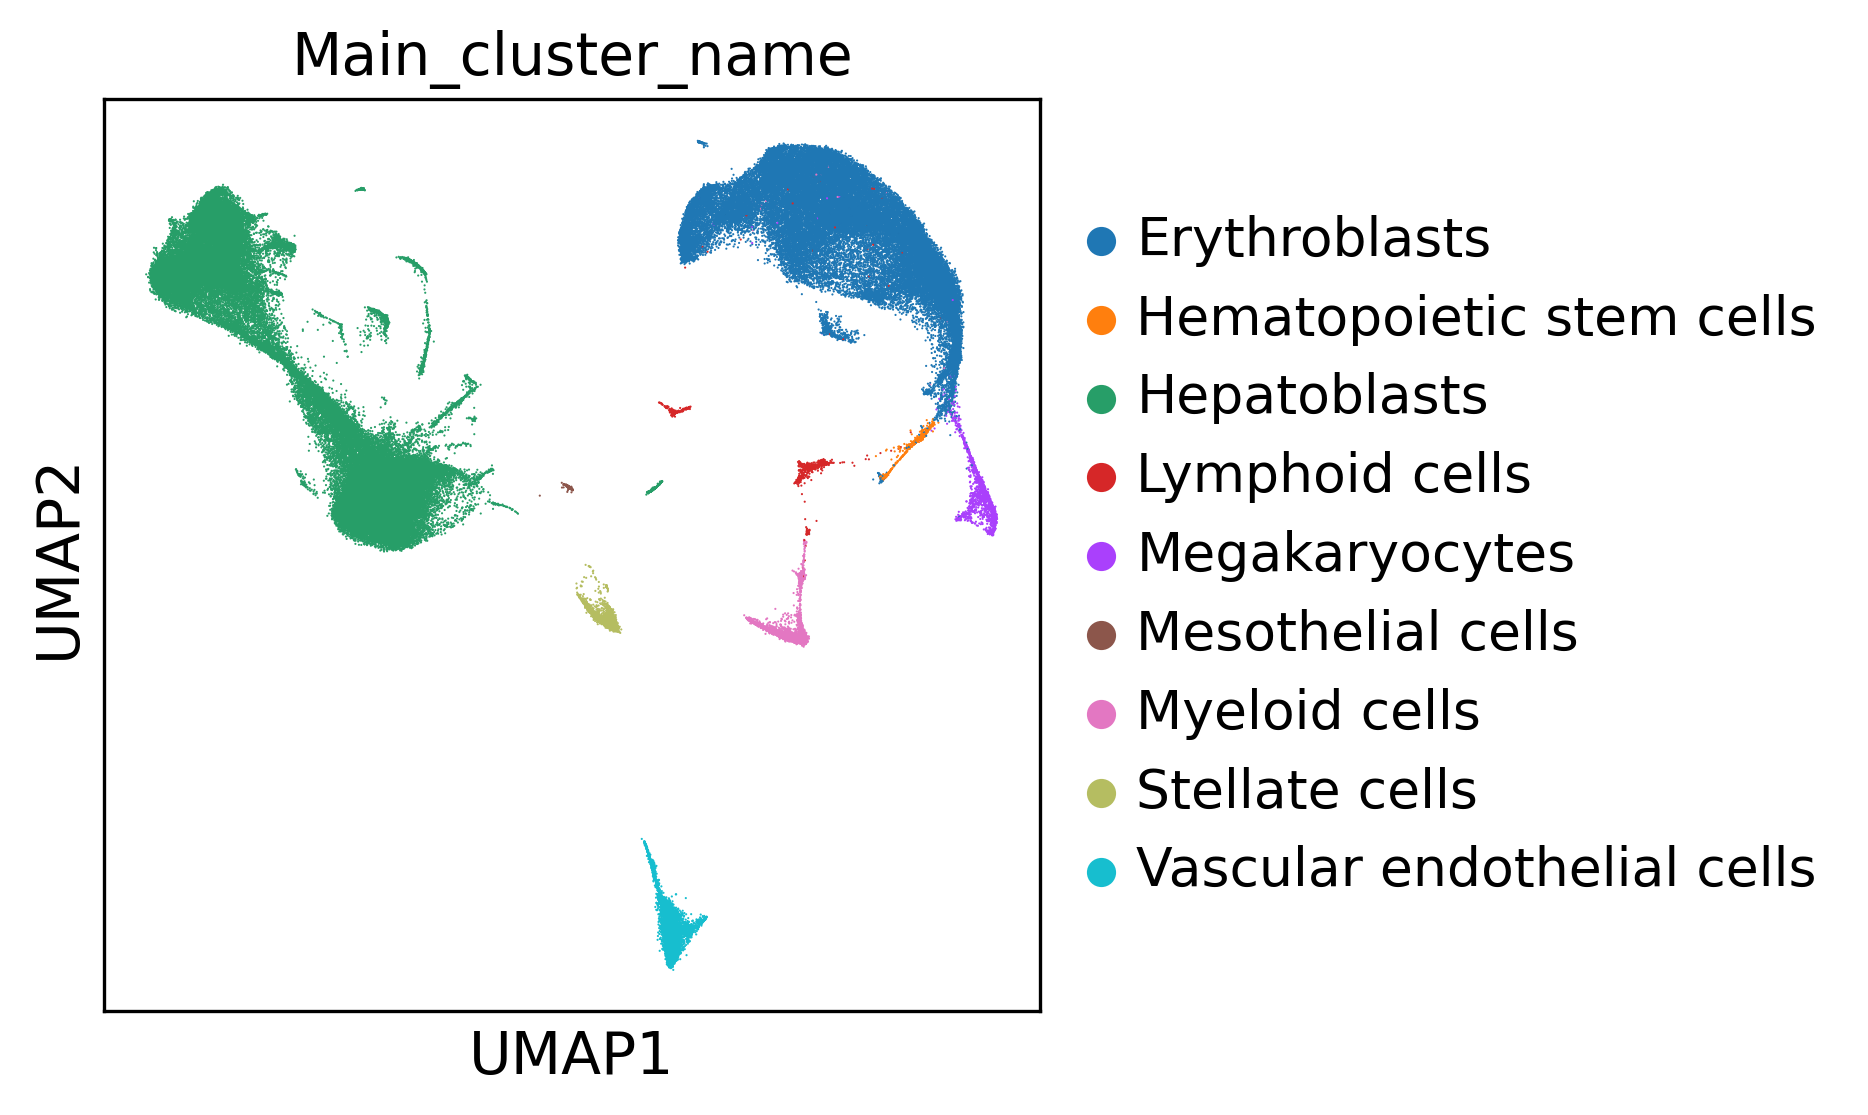

In [3]:
sc.pl.umap(loaded_adata, color="Main_cluster_name")